In [4]:
# importing libraries 
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 

In [28]:
#Step 1 - Build Model
model = Sequential() 

model.add(Conv2D(32, (2, 2), input_shape = (224, 224, 3)))
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 223, 223, 32)      416       
_________________________________________________________________
activation_21 (Activation)   (None, 223, 223, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 110, 110, 32)      4128      
_________________________________________________________________
activation_22 (Activation)   (None, 110, 110, 32)      0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 54, 54, 64)        8256      
__________

In [29]:
#Step 2 - Train Model
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True) 
  
test_datagen = ImageDataGenerator(rescale=1. / 255) 
  
training_set = train_datagen.flow_from_directory('../datasets/training_set', 
                                                    target_size=(224, 224), 
                                                    batch_size = 16, 
                                                    class_mode ='binary') 
  
test_set = test_datagen.flow_from_directory('../datasets/test_set', 
                                                        target_size =(224, 224), 
                                                        batch_size = 16, 
                                                        class_mode ='binary') 

history=model.fit_generator(training_set,
                            steps_per_epoch = 266 // 16,
                            epochs = 200,
                            validation_data = test_set, 
                            validation_steps = 156 // 16) 

Found 266 images belonging to 2 classes.
Found 156 images belonging to 2 classes.
Epoch 1/200
16/16 [==============================] - 10s 608ms/step - loss: 0.9307 - acc: 0.6133 - val_loss: 0.4152 - val_acc: 0.7986
Epoch 2/200
16/16 [==============================] - 8s 523ms/step - loss: 0.5057 - acc: 0.7782 - val_loss: 0.4343 - val_acc: 0.7500
Epoch 3/200
16/16 [==============================] - 9s 538ms/step - loss: 0.4153 - acc: 0.8039 - val_loss: 0.5120 - val_acc: 0.7214
Epoch 4/200
16/16 [==============================] - 8s 519ms/step - loss: 0.4286 - acc: 0.8022 - val_loss: 0.3500 - val_acc: 0.7929
Epoch 5/200
16/16 [==============================] - 8s 520ms/step - loss: 0.3798 - acc: 0.8051 - val_loss: 0.3536 - val_acc: 0.7929
Epoch 6/200
16/16 [==============================] - 8s 523ms/step - loss: 0.3361 - acc: 0.8240 - val_loss: 0.2922 - val_acc: 0.8571
Epoch 7/200
16/16 [==============================] - 8s 520ms/step - loss: 0.3925 - acc: 0.8039 - val_loss: 0.3148 - va

Epoch 122/200
16/16 [==============================] - 9s 577ms/step - loss: 0.0150 - acc: 0.9922 - val_loss: 0.2537 - val_acc: 0.9571
Epoch 123/200
16/16 [==============================] - 9s 566ms/step - loss: 0.1063 - acc: 0.9765 - val_loss: 0.4206 - val_acc: 0.9429
Epoch 124/200
16/16 [==============================] - 9s 560ms/step - loss: 0.0302 - acc: 0.9900 - val_loss: 0.7127 - val_acc: 0.9214
Epoch 125/200
16/16 [==============================] - 11s 685ms/step - loss: 0.0114 - acc: 0.9961 - val_loss: 0.5256 - val_acc: 0.9286
Epoch 126/200
16/16 [==============================] - 12s 731ms/step - loss: 9.6572e-04 - acc: 1.0000 - val_loss: 0.2001 - val_acc: 0.9714
Epoch 127/200
16/16 [==============================] - 12s 732ms/step - loss: 0.1200 - acc: 0.9648 - val_loss: 0.2340 - val_acc: 0.9643
Epoch 128/200
16/16 [==============================] - 10s 605ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.2877 - val_acc: 0.9571
Epoch 129/200
16/16 [==========================

16/16 [==============================] - 11s 701ms/step - loss: 0.1475 - acc: 0.9765 - val_loss: 0.1071 - val_acc: 0.9714
Epoch 183/200
16/16 [==============================] - 11s 690ms/step - loss: 0.0125 - acc: 0.9922 - val_loss: 0.6078 - val_acc: 0.9214
Epoch 184/200
16/16 [==============================] - 11s 690ms/step - loss: 0.3842 - acc: 0.9531 - val_loss: 0.3200 - val_acc: 0.9286
Epoch 185/200
16/16 [==============================] - 11s 679ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.4994 - val_acc: 0.9071
Epoch 186/200
16/16 [==============================] - 11s 672ms/step - loss: 0.0266 - acc: 0.9883 - val_loss: 0.2764 - val_acc: 0.9714
Epoch 187/200
16/16 [==============================] - 11s 666ms/step - loss: 0.0186 - acc: 0.9900 - val_loss: 1.0213 - val_acc: 0.9000
Epoch 188/200
16/16 [==============================] - 11s 695ms/step - loss: 0.1944 - acc: 0.9805 - val_loss: 0.5065 - val_acc: 0.9429
Epoch 189/200
16/16 [==============================] - 11s 671

In [30]:
print('history dict:', history.history)

history dict: {'val_loss': [0.41524333755175274, 0.43433844361986435, 0.5119582550866263, 0.3499911768095834, 0.3536218787942614, 0.292225615467344, 0.3148216528551919, 0.4484274915286473, 0.3054524166243417, 0.30952621081045695, 0.19525526960690817, 0.2505161600453513, 0.31949550424303325, 0.24433738333838326, 0.20847131141594477, 0.40940179313932146, 0.2619638245020594, 0.28182822593620843, 0.28419688173702784, 0.16903261860300386, 0.2437624947892295, 0.4384486334664481, 0.28557737512247905, 0.12620264858539615, 0.11029388015823705, 0.5924551282610212, 0.351499023607799, 0.10342241922127349, 0.2764495385544641, 0.21067408152988978, 0.11561496928334236, 0.1341505774429866, 0.16013120050941196, 0.1790675968996116, 0.13091469215495247, 1.0366076248032705, 0.16538284165518624, 0.19291260253105844, 0.22702582167195423, 0.19451162139219896, 0.7501576791206995, 0.15424893607518503, 0.173352840755667, 0.46194611990026063, 0.3609195933145072, 0.07686367857136897, 0.26645397119490166, 0.091591

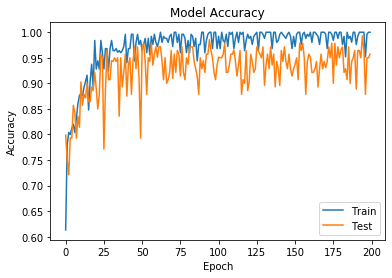

In [31]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

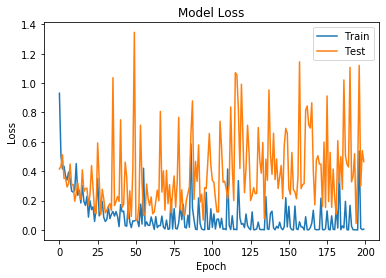

In [32]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [33]:
model.save('../model/SmartBin-Model.h5')
model.save('../model/SmartBin-Model.json')

In [34]:
print(training_set)